Previously, we were able to use LLMs to perform sentiment analysis on Wikipedia articles; however, the results can seem a bit overwhelming in tabular form. In this example, we'll look at how to generate useful visualizations for the results that we obtained previously. First, let's import our plotting utilities.

In [1]:
from sentiment_plots import plot_individual

First we'll look at plot_individual, which displays each row of the .csv file individually. Let's specify the inputs for our plotting function.  We need to say which models we want to see the results for. This can be all or only some of the models you used previously in your analysis. However, it won't work if you specify models that were not used in the analysis, so be careful! Most of the other inputs are the same as what we saw in previous examples, but let's take a look at three new ones. The save_fig parameter specifies whether you want to save the figure that is generated. It's true by default, but you can set it to false if you just want to display it in Jupyter or your IDE. There are two options for the plot_metric parameter: 'paragraph_percent', which shows the percent breakdown of paragraphs by sentiment, and 'article_probability', which shows the aggregated probability of the article belonging to each sentiment. Finally, the labels_col parameter allows you to specify the column name from your .csv file that you want to use for generating the labels.  

In [2]:
models=['bert','roberta','robertuito'] #models you used previously when predicting sentiment. May use all or only some
input_filename='beatles_analysis.csv' #analysis csv file you wish to use for plotting
input_path='path/to/my/file' #Input filepath of csv file. If left unspecified, it is the current working directory
output_filename='beatles_paragraph_analysis_fig.png' #Name of figure to be saved (if save_fig==True). Default = 'figure.png'
output_path='path/to/my/file' #Filepath at which the figure is saved (if save_fig==True). If left unspecified, figure will be saved in working location
save_fig=True #Whether or not to save the figure. True by default
plot_metric='paragraph_percent' #Either 'paragraph_percent' (default) or 'article_probability'
labels_col='Name' #Name of column in the csv file that contains the labels for the plot. Default='Name'

As you can see, we're using the Beatles example from earlier. We're going to generate a plot from the .csv file we generated from the analyze_csv example, and this plot will show a percent breakdown of paragraphs by sentiment. Let's see what it looks like!

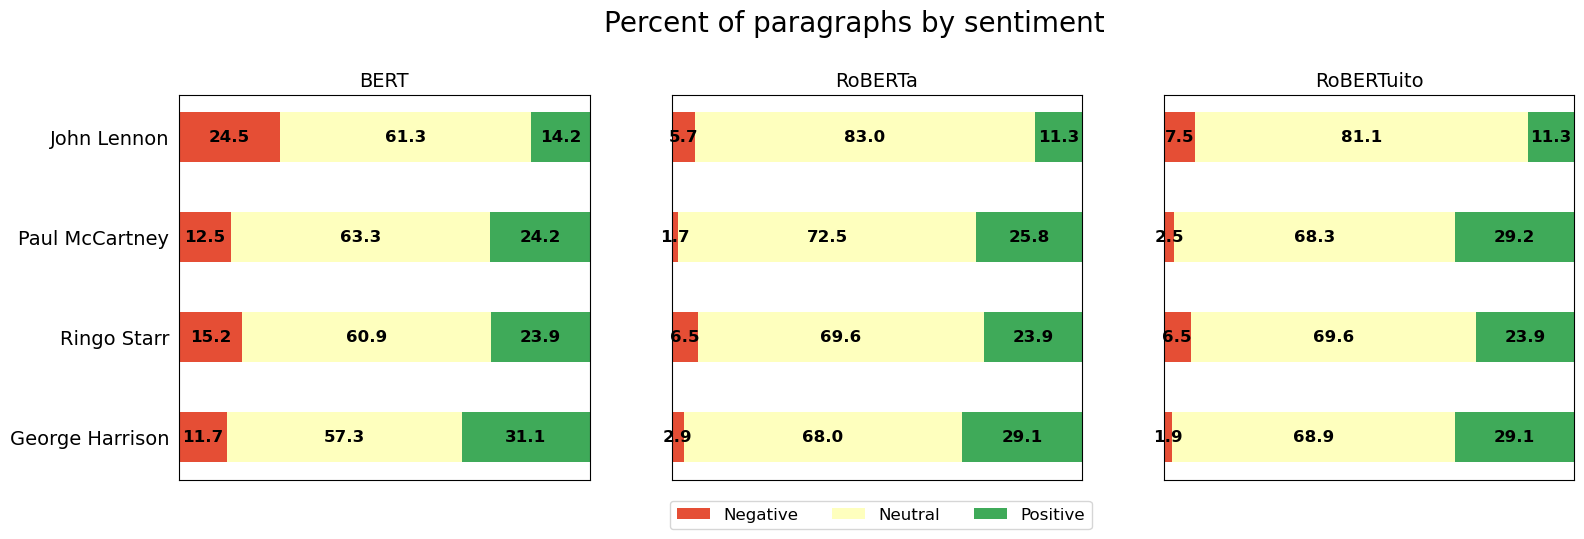

In [3]:
plot_individual(models,input_filename,output_filename=output_filename,save_fig=save_fig,plot_metric=plot_metric)

Nice! As you can see, the Wikipedia articles for the Beatles mostly have neutral or nice things to say. The article with the most negative sentiment belongs to John Lennon: this is a fairly unsurprising result since he was more overtly political compared to the other members which caused some controversy, and he is often blamed for causing the band to break up. Also notice the differences between the models: the standard BERT model is much more sensitive to negative sentiment compared to the other two models. There is also a DistilBERT model that's available in this code that I'm not showing because it's very extreme: it almost never predicts neutral sentiment and I personally find it unsuitable for analyzing Wikipedia articles. However, it's there if you want to use it. Next, let's do an analysis of article probability by sentiment and update the name of the figure that we want to save.

In [4]:
plot_metric='article_probability'
output_filename='beatles_probability_analysis_fig.png'

Let's plot!

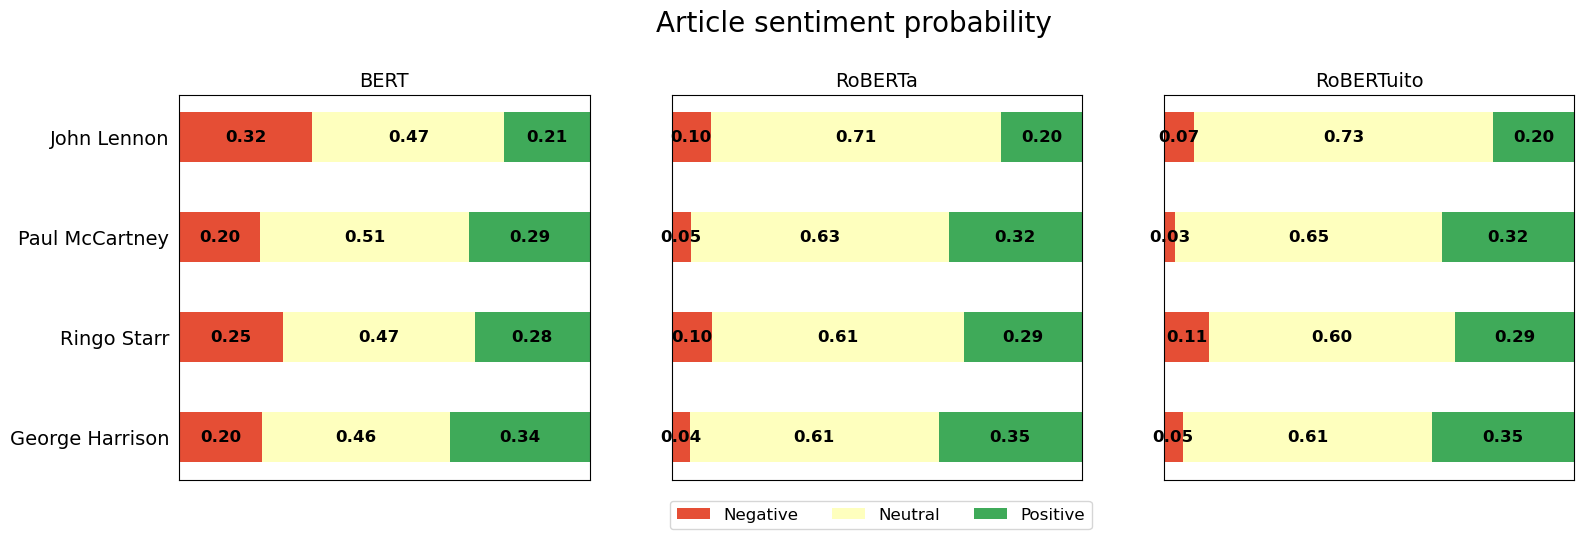

In [5]:
plot_individual(models,input_filename,output_filename=output_filename,save_fig=save_fig,plot_metric=plot_metric)

These results seem pretty consistent with the previous figure. As you can see, plot_individual is useful when you want to look at a set of individual Wikipedia articles. But what if you have a large dataset? In that case, this approach won't work well because 1. the plot will be completely unwieldy and 2. it will be difficult to derive any meaningful conclusions from it. In this case, we will want the ability to group entries prior to generating the plot: in this way, we will be able to see the trends in sentiment across different groups of Wikipedia articles. However, I'm currently in the process of coding this functionality, so for now you'll have to wait!